In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from statsmodels.tsa.api import SimpleExpSmoothing

In [2]:
# read excel file
xls = pd.ExcelFile("../data/single-family-home-sales.xlsx")
df = pd.read_excel(xls, sheet_name=xls.sheet_names[0], header=0, usecols="A:B")

# tidy the time series
df.drop(df.tail(1).index, inplace=True)
df = df.set_index("Month")
df = df.rename(columns={"Home Sales": "home_sales"})
series = pd.Series(df.home_sales, index=df.index)

# impute data
tidy_series = series.dropna()
tidy_series.head(2)

Month
1990-01    45.0
1990-02    50.0
Name: home_sales, dtype: float64

In [3]:
# define simple exponential smoothing class
ses = SimpleExpSmoothing(tidy_series)

# fit class to models
fit_08 = ses.fit(smoothing_level=0.8, optimized=False)
fit_06 = ses.fit(smoothing_level=0.6, optimized=False)
fit_02 = ses.fit(smoothing_level=0.2, optimized=False)

# predict using models
pred_08 = fit_08.forecast(1).rename("$\\alpha = 0.8$")
pred_06 = fit_06.forecast(1).rename("$\\alpha = 0.6$")
pred_02 = fit_02.forecast(1).rename("$\\alpha = 0.2$")

print(f"SES Predictions: \nalpha \n .8: {pred_08[0]:.2f}\n .6: {pred_06[0]:.2f}\n .2: {pred_02[0]:.2f}")

SES Predictions: 
alpha 
 .8: 46.11
 .6: 48.68
 .2: 54.84
/home/vcwild/anaconda3/envs/codenation/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


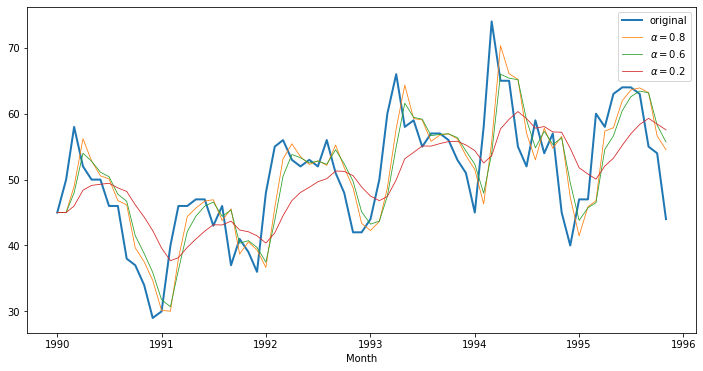

In [4]:
import seaborn as sns

# set index to datetime, drop last row
index = pd.to_datetime(series.index)

# plot all predictions
plt.figure(figsize=(12, 6))
sns.lineplot(x=index, y=series.values, linewidth=2, label="original")
sns.lineplot(x=index, y=fit_08.fittedvalues.values, linewidth=.8, label=pred_08.name)
sns.lineplot(x=index, y=fit_06.fittedvalues.values, linewidth=.8, label=pred_06.name)
sns.lineplot(x=index, y=fit_02.fittedvalues.values, linewidth=.8, label=pred_02.name);